# [E-11] 어제 오른 내 주식, 과연 내일은?

### 시계열 예측이란?

* 시계열: **시간 순서대로 발생한 데이터의 수열**
    * 지금까지의 주가 변화를 바탕으로 다음 주가 변동 예측
    * 특정 지역의 기후데이터를 바탕으로 내일의 온도 변화 예측
    * 공장 센터 데이터 변화 이력을 토대로 이상 발생 예측

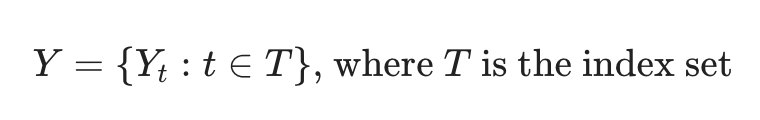

단, 일정 시간 간격으로 발생한 데이터일 때가 많지만 꼭 그래야만 하는 것은 아니다. 매일의 주식 거래 가격을 날짜-가격 형태로 날짜순으로 모라둔 데이터가 있다면 훌륭한 시계열 데이터가 될 것인다. 이 때 날짜가 인덱스 역할을 하게 된다.
<br>
그리고, **예측이 불가능한** 미래의 데이터를 예측해보려 한다면 적어도 **두가지 전제가 필요하다.**
* 과거의 데이터에 일정한 패턴이 발견된다.
* 과거의 패턴은 미래에도 동일하게 반복될 것이다.
<br>
위 두가지 전제를 한 문장으로 줄이면, 

> 안정적(stationary) 데이터에 대해서만 미래 예측이 가능하다.

위에서 안정적(stationary)이다는 것은 **시계열 데이터의 통계적 특성이 변하지 않는다는 뜻이다.** 즉, 시계열 데이터를 만들어내는 시간의 변화에 무관하게 일정한 프로세스가 존재한다는 뜻이다.
<br>
<br>
예를 들어 매우 불규칙해 보이는 매일의 날씨 변화에도 불구하고 연 단위 기후 변화의 일정한 패턴이 유지된다면, 지구상의 일정한 기후변동 프로세스가 만들어 내는 안정성(stationarity)에 의해 내일의 기온은 어느 정도 오차범위 내에서 예측이 가능할 것이다.
<br>
<br>
결론적으로 시계열 데이터 분석은 어떤 예측하지 못한 **외부적 변수**에 의해 시계열 데이터 분석의 전제가 되는 **안정성(stationarity)** 훼손될 여지가 있기 때문에 완벽한 미래 예측을 보장하지는 않는다. 하지만, 시계열 데이터 분석은 프로세스 내재적인 시간적 변화를 묘사하는데 아주 훌륭한 성능을 보인다.

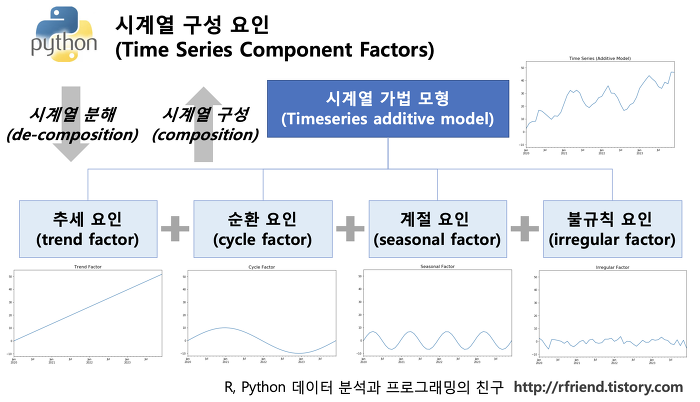

(위 이미지에 대한 출처와 자세한 설명: https://rfriend.tistory.com/509)

안정적인 시계열에서 시간의 추이와 관계없이 일정해야 하는 통계적 특성 세가지
* 평균: 분포의 중간부분
* 분산: 분포가 얼마나 퍼져있는가
* 공분산(자기공분산, autocovariance)
    * 확률변수가 두가지(예를 들어 x, y)일때 이 확률분포들이 어떤 모양으로 되어있늕지르 ㄹ알고 싶을 때 가장 먼저 X의 평균, Y의 평균이다.
    * 이렇게 되면 대충 분포가 어디에 주로 모여있는지 (m_x, m_y)가 나온다.
    * 그 다음으로 궁금한게 얼마나 퍼져있는지임. 
    * 얼마나 퍼져있는지는 확률변수의 분산을 구하면 되지만, 각 확률변수들이 어떻게 퍼져있는지를 나타내는 것이 **공분산**이다.
    * 즉, 두 확률변수가 어떤 모양으로 퍼져있는지, X가 커지면 Y도 커지거나 혹은 작아지거나 아니면 별 상관이 없거나 등을 나타내어 주는 것임
    * **X의 편차와 Y의 편차를 곱한 것의 평균**

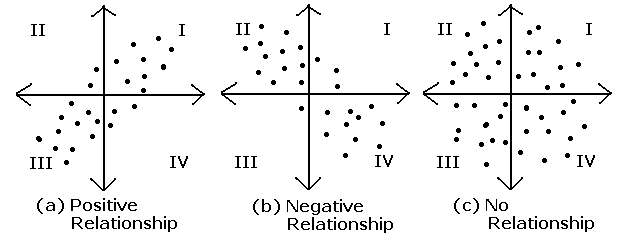

* 상관계수(Correlation)
    * 공분산의 문제인 X와 Y의 단위 크기에 영향을 받는 점을 보완하기 위한 것.
    * 예를 들어 100점 만점인 두 과목의 점수 공분산은 별로 상관성이 부족하지만 100점 만점이기 때문에 큰 값이 나오고, 10점 만점짜리 두 과목의 점수 공분산은 상관성이 아주 높지만 10점 만점이기 때문에 작은 값이 나온다. 이런 단위 크기에 영향을 받는 문제를 보완하기 위한 것임.
    * 즉, **확률변수의 절대적 크기에 영향을 받지 않도록 단위화 시켰다고 보면 된다.**
    * 분산의 크기만큼 나눈 거임.
    * 상관계수의 성질
        * 상관계수의 절대값은 1을 넘을 수 없다.
        * 확률변수 X, Y가 독립이라면 상관계수는 0이다.
        * X와 Y가 선형적 관계라면 상관계수는 1 또는 -1이다. 양의 관계=1, 음의 관계=-1

> 시계열 예측의 대전제:**과거의 패턴이 미래에도 반복될 것이다.**

### 데이터 사례 분석

In [3]:
# 온도를 다루는 시계열 데이터
# Daily Minimum Temperatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/daily-min-temperatures.csv'
df = pd.read_csv(dataset_filepath)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [7]:
# 위 dataframe에서 date 컬럼을 index 삼아 시계열을 생성
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [8]:
ts1 = df['Temp']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

DataFrame인 df와 Series인 df['temp']는 index 구조가 동일하므로, Numpy, pandas, Matplotlib등 많은 라이브러리들이 호환해서 지원해준다. 하지만 그렇지 않은 경우도 간혹 발생하므로 여기서는 명확하게 Series 객체를 가지고 진행한다.

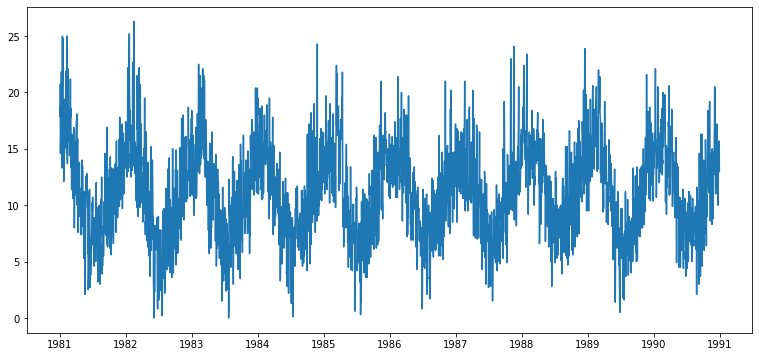

In [9]:
# 시각화를 통해 안정성(stationarity) 여부 확인
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6 # matlab 차트의 기본 크기를 13, 6으로 지정해 줌

# 시계열 데이터를 차트로 그린다.
plt.plot(ts1)

In [10]:
# 결측치가 있는지 확인
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

이 데이터에는 결측치가 없지만 만약 있다면 어떤 조치를 해줘야함. NaN이 들어있는 데이터는 통계분석 시에 많은 오류를 일으킬뿐더러 분석 결과에도 악영향을 미친다.
<br>
결측치 처리 방법
* 결측치가 있는 데이터를 모두 삭제(drop)
* 결측치 양옆의 값들을 이용해서 적절히 보간(interpolate)하여 대입(2와 4사이 데이터가 NaN이라면 3으로 채우는 방식)

In [12]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

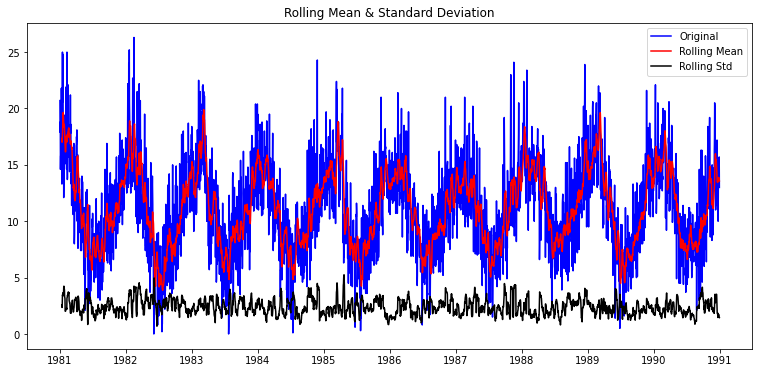

In [13]:
plot_rolling_statistics(ts1, window=12)

In [14]:
# International airline passengers 데이터셋
# 월별 항공 승객수(천명 단위) 시계열 데이터
dataset_path = os.getenv('HOME') + '/aiffel/stock_prediction/data/airline-passengers.csv'
df =pd.read_csv(dataset_path, index_col='Month', parse_dates=True).fillna(0)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


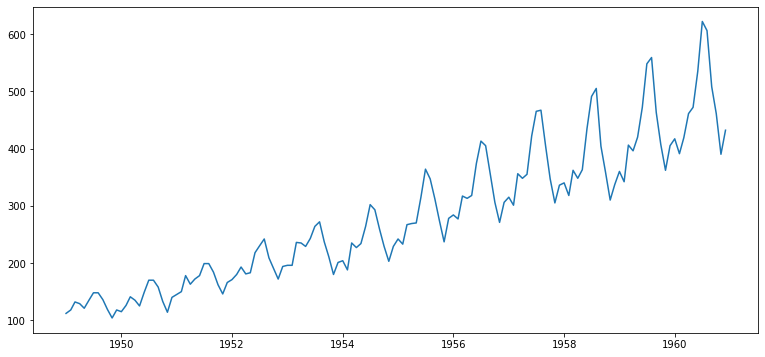

In [15]:
ts2 = df['Passengers']
plt.plot(ts2)

시간이 지남에 따라 시계열의 평균과 분산이 지속적으로 커지는 패턴을 보인다. 

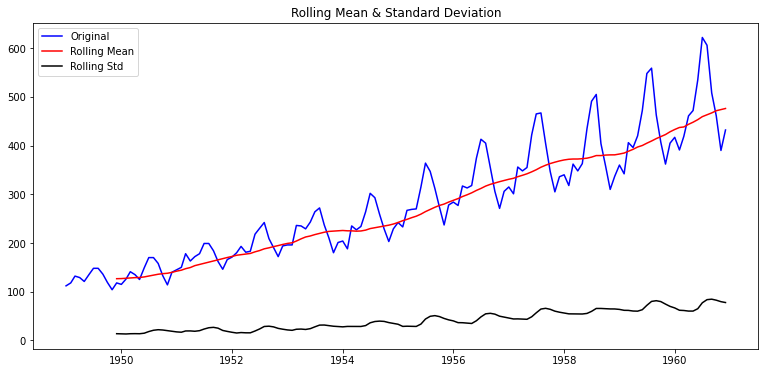

In [17]:
# rolling statistics를 추가해서 시각화
plot_rolling_statistics(ts2, window=12)

위처럼 시간의 추이에 따라 평균과 분산이 증가하는 패턴을 보인다면 이 시계열 데이터는 적어도 안정적이진 않다고 결론을 내려볼 수 있다

### stationary 여부를 체크하는 통계적 방법

* Augmented Dickey-Fuller Test(ADF Test)
    * 시계열 데이터의 안정성(stationary)을 테스트하는 통계적 방법
    * **주어진 시계열 데이터가 안정적이지 않다**라는 귀무가설을 세운후, 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에 **이 시계열 데이터가 안정적이다라는 대립가설을 채택한다.**
        * **귀무가설**
            * 통계학에서 처음부터 버릴 것을 예상하는 가설
            * 차이가 없거나 의미있는 차이가 없는 경우의 가설
            * 이것이 맞거나 맞지 않다는 통계학적 증거를 통해 증명하려는 가설
            * 모집단의 모수는 ~와 같다, 또는 모집단의 모수는 ~와 차이가 없다.라고 가정하는 것을 말한다.
                * 만약 전국 남학생의 평균 키가 170cm라는 주장을 통계적으로 검정한다면, 이에 대한 귀무가설은 '전국 남학생의 평균 키는 170cm과 같다.(또는 차이가 없다.)가 된다.
                * 제약 회사에서 개발한 백신의 효과를 검정한다면, 귀무가설은 '개발한 백신은 효과가 없다.(또는 차이가 없다.)'가 된다.
            * 즉, 귀무가설은 '-와 차이가 없다.''-의 효과가 없다.''-와 같다'라는 형식으로 설정된다.
        * **대립가설**
            * 귀무가설이 거짓이라면 대안적으로 참이되는 가설
            * 귀무가설이 틀렸다고 판단했을 때, 대안적으로 선택하는 가설
            * 모집단의 모수는 ~와 같다, 또는 모집단의 모수는 ~와 차이가 있다.라고 가정하는 것을 말한다.
                * 만약 전국 남학생의 평균 키가 170cm라는 주장을 통계적으로 검정한다면, 이에 대한 대립 가설은 '전국 남학생의 평균 키는 170cm와 다르다.라고 할 수 있다.
                * 제약 회사에서 개발한 백신의 효과를 검정한다면, 대립가설은 '개발한 백신은 효과가 있다. 가 된다.
            * 즉, 대립가설은 ~와 차이가 있다, ~의 효과는 있다, ~와 다르다. 라는 형식으로 설정된다.

* **p-value**
    * 귀무가설이 참이라고 가정했을 때, 표본으로 얻어지는 통계치가 나타날 확률
    * 간단하게 말해서 p값이 낮으면 귀무가설을 채택하지 않고 대립가설을 채택하게 된다.

다시 ADF Test로 돌아와서, ADF Test는 **정상성을 알아보기 위한 단위근 검정 방법이다.** 단위근(unit root)이란, x=1, y=1인 해로, 시계열 자료에서 예측할 수 없는 결과를 가져올 수 있다.
<br>
<br>
검정에는 자료에 단위근이 존재한다는 귀무가설과 자료에 단위근이 존재하지 않아 시계열 자료가 정상성을 만족한다는 대립가설, 이 2가지 가설을 사용하고, 검정을 통해 귀무가설을 기각하면 정상성을 띈다고 볼 수 있다.
<br>
<br>
ADF 검정은 DF 검정을 일반화한 검정인데, DF 단위근 검정은 단위근이 존재한다는 귀무가설을 통계적으로 검정하는 방법이다.
<br>
그냥 결론만 말하면 ADF 검정의 귀무가설은 DF 검정과 귀무가설이 같으므로 **검정통계량이 Critical Value보다 작거나 p-value가 설정 유의수준 값보다 작으면 정상적**인 시계열 데이터라고 볼 수 있다. 

In [18]:
# statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 
# 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [20]:
# 이전 스텝에서 정성적으로 분석했던 두 시계열에 대한 ADF Test를 수행해본다.
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


ts1 시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 0에 가깝게 나타났다.
<br>
따라서 이 귀무가설은 기각되고, 이 시계열은 안정적 시계열이라는 대립가설이 채택된다.

In [22]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


ts2 시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 1에 가깝게 나타났다. 
<br>
p-value가 1에 가깝다는 것이 이 귀무가설(주어진 시계열 데이터가 안정적이지 않다.)이 옳다는 직접적인 증거는 아니다.
<br>
하지만 **이 귀무가설을 기각할 수는 없게 되었으므로,** 이 시계열 데이터는 안정적인 시계열이라고 말할 수는 없다.
    

### Stationary하게 만들 방법은 없을까?

안정적이지 않은 시계열을 분석하려면 이를 안정적인 시계열로 바꾸어 내야 하는데, 그 방법으로 크게 두 가지가 있다.
1. 정성적인 분석을 통해 보다 안정적(stationary)인 특성을 가지도록 기존의 시계열 데이터를 가공/ 변형하는 시도
2. 시계열 분해(Time series decomposition)기법을 적용

### 1. 보다 Stationary한 시계열로 가공해 가기
#### 1-1. 로그함수 변환

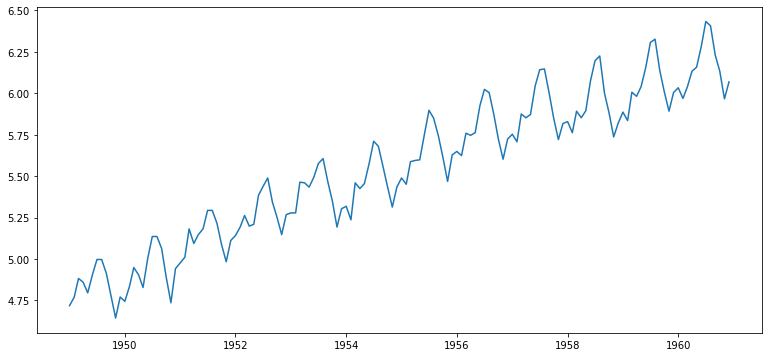

In [23]:
# 가장 먼저 고려해볼 수 있는 것은 시간 추이에 따라 분산이 점점 커지고 있다는 것.
# 시계열이 이런 특성을 보일 경우 로그함수로 변환을 해주는 것이 도움이 된다.
ts_log = np.log(ts2)
plt.plot(ts_log)

In [24]:
# ADF Test 수행
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


* p-value가 0.42로 무려 절반 이상 줄어든 것을 확인할 수 있다.
* 정성적으로도 시간 추이에 따른 분산이 일정해진 것을 확인할 수 있다.
* 단, 가장 두드러지는 문제점은 시간 추이에 따라 평균이 계속 증가한다는 점이다.

#### 1-2. Moving average 제거 - 추세(trend) 상쇄하기

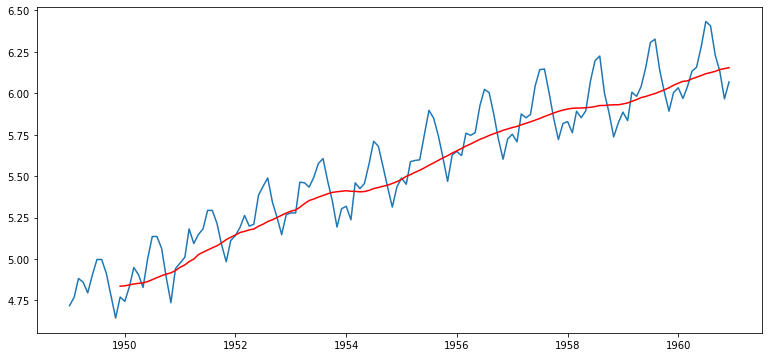

In [25]:
# 시계열 분석에서 위와 같이 시간 추이에 따라 나타나는 평균값 변화를 추세(trend)라고 한다.
# 이 변화량을 제거해주려면 거꾸로 Moving Average, 즉 rolling mean을 구해서 ts_log에서 빼준다
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [26]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

In [27]:
# Moving Average가 계산되지 않은 앞의 11개 데이터는 결측치 발생
# 향후 DF Test시 에러를 발생시킬 것이므로 데이터셋에서 제거해준다.
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

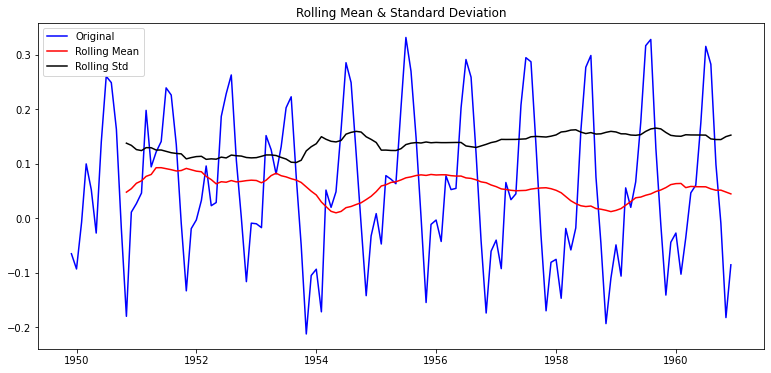

In [28]:
# ts_log_moving_avg를 정성, 정량적으로 분석해본다.
plot_rolling_statistics(ts_log_moving_avg)

In [29]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


p-value가 0.02 수준이 되어 95%이상의 confidence로 이 time series는 stationary하다고 할 수 있으나, Moving Average를 계산하는 window=12로 정확하게 지정해 주어야 한다는 점이다.

In [30]:
# 만약 위 코드에서 window=6을 적용하면
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

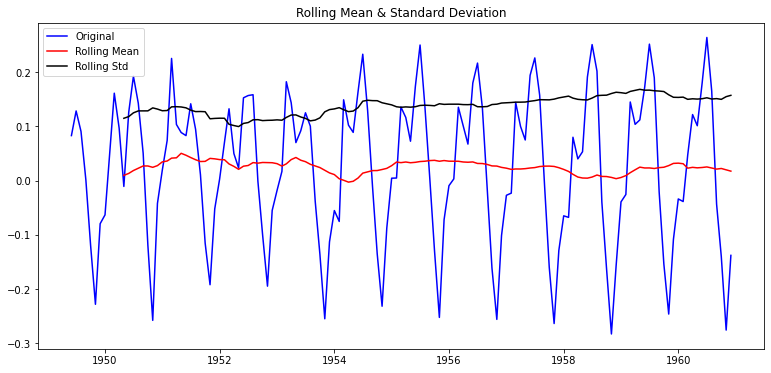

In [31]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [32]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


그래프를 정성적으로 분석해서는 window=12일 때와 별 차이를 느끼지 못하지만 ADF 검증 결과 p-value가 0.18 수준이어서 아직도 안정적 시계열이라고 말할 수 없게 됨.
<br>
<br>
이 데이터셋은 월 단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window=12가 적당하다는 것을 추측할 수 있지만 moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기를 결정하는 것이 매우 중요하다는 것을 기억해두자.

#### 1-3. 차분(Differencing)-계절성(Seasonality) 상쇄하기
이전까지 시간의 추이에 따라 평균이 증가하는 trend를 제거하였는데, trend에는 잡히지 않지만 시계열 데이터 안에 포함된 **패턴이 파악되지 않은 주기적 변화**는 예측에 방해가 되는 불안정성 요소이다. 이것은 Moving Average 제거로는 상쇄되지 않는 효과로서, 이런 주기적, 계절적 패턴을 계절성(Seasonality)라고 한다.
<br>
https://otexts.com/fppkr/tspatterns.html

* 차분(Differencing)
    * 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼주는 방법
    * 남은 것은 현재 스텝값 - 직전 스텝값이 된다.
    * **이번 스텝에서 발생한 변화량을 의미하게 된다.**

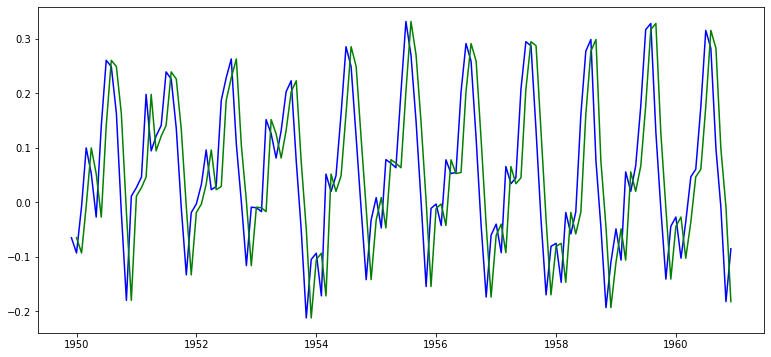

In [33]:
# 시프트한 시계열과 원본 시계열에 대한 그래프를 그래프 그리기
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

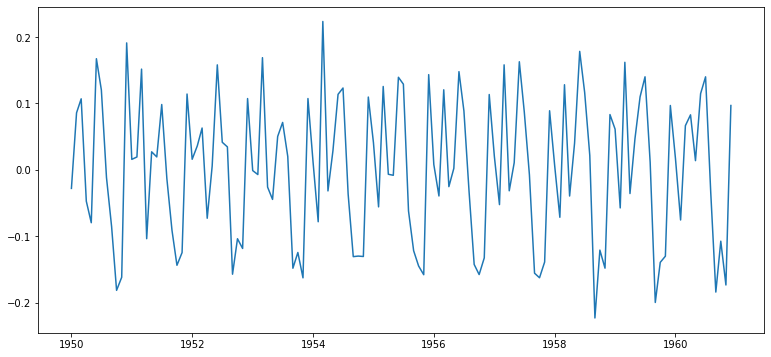

In [34]:
# 원본 시계열에서 시프트한 시계열을 뺀 값을 그래프로 표현하기
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

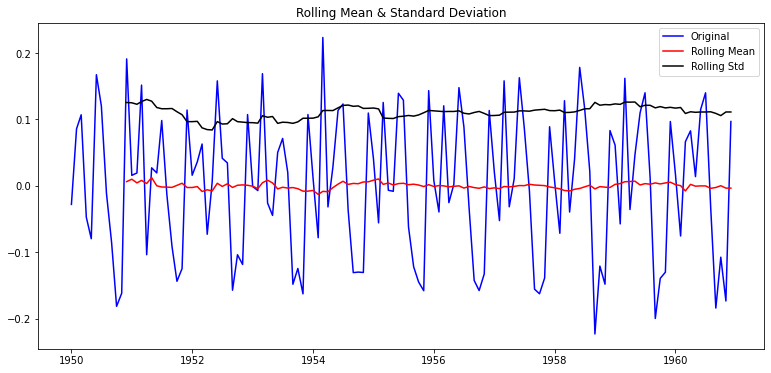

In [35]:
# 이동평균과 이동 표준편차를 그래프에 나타내어 정성적으로 안정성(stationary) 여부를 파악하기
plot_rolling_statistics(ts_log_moving_avg_diff)

In [36]:
# 차분의 효과를 알아보기
# ADF 검증 수행
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


### 2. 시계열 분해(Time series decomposition)
statsmodels 라이브러리 안에는 seasonal_decompose 메서드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있다. 이 기능을 활용해 이전에 직접 수행했던 moving average 제거, diffenencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 된다. 

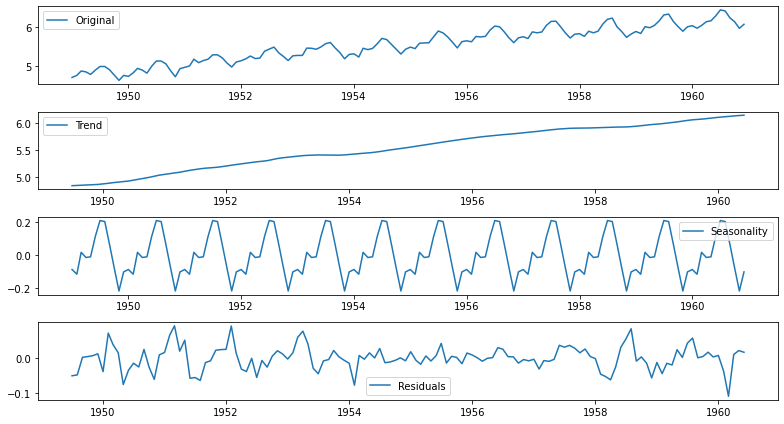

In [37]:
# 로그 변환 단계(ts_log)부터 출발한다.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

original 시계열에서 trend와 seasonality를 제거하고 난 나머지를 residual이라고 한다. 즉, Trend + Seasonality + Residual = Original 이 성립한다.
이런 Decomposing은 시계열 데이터를 이해하는 중요한 관점을 제시해준다.

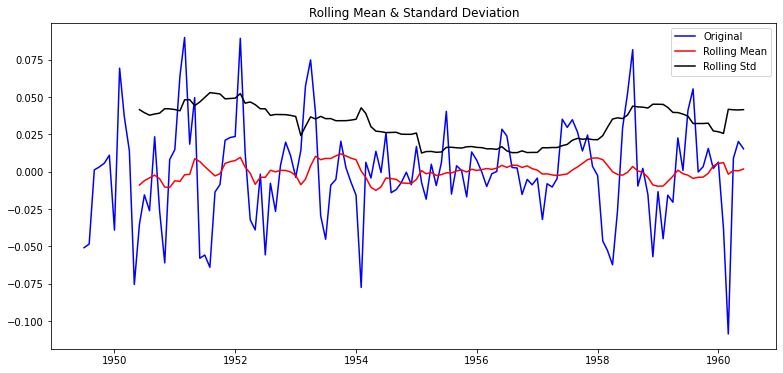

In [38]:
# Residual에 대해 안정성 여부를 따진다.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [39]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


decomposing을 통해 얻어진 Residual은 압도적으로 낮은 p-value를 보여준다. 

### ARIMA(Autoregressive Integrated Moving Average) 모델의 개념

* ARIMA 모델의 정의
    * 시계열 데이터가 Trend, Seasonality, Residual로 분해되는 것을 확인했다. 또, trend와 seasonality를 잘 분리해 낸 경우 Residual이 예측력 있는 안정적인 시계열 데이터가 되는 것을 확인했는데, 이 원리를 이용해 시계열 데이터 예측 모델을 자동으로 만들 수 있다.
    * ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average)라고 할 수 있는데, 각각의 개념을 보면 지금까지 배운 개념과 닮아 있음을 알게된다.

* AR(자기회귀, Autoregressive)
    * 과거 값들에 대한 회귀로 미래값을 예측하는 방법
    * 예측하려는 값 Y가 이전 p개의 데이터의 가중합으로 수렴한다고 보는 모델
    * AR은 시계열의 Residual에 해당하는 부분을 모델링한다고 볼 수 있다.
    * 가중치의 크기가 1보다 작은 값들의 가중합으로 수렴하는 자기 회귀모델과 안정적 시계열은 통계학적으로 동치이다.
    * 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 AR로 모델링 하는 관점이라고 볼 수 있다.

* 1-2. MA(이동평균, Moving Average)
    * 예측하려는 값 Y가 이전 q개의 예측오차값의 가중합으로 수렴한다고 보는 모델이다.

* I(차분 누적, Integration)
    * 예측하려는 값 Y가 이전 데이터와 d차 차분의 누적(integration)합이라고 보는 모델이다.
    * I는 시계열의 Seasonality에 해당하는 부분을 모델링한다고 볼 수 있다.

만약 어제 주식값이 떨어졌다는 것을 알게되었을 때, 
* 오늘은 주식이 올라서 균형을 맞추겠지? 라는 AR 형태의 기대
* 어제 떨어졌으니 추세적으로 계속 떨어지지 않을까 라는 MA 형태의 우려
두 가지가 동시에 떠오르게 되는데, **ARIMA는 두 모델 사이에서 적정 수준을 찾아가는 능력을 보여준다.**

* ARIMA 모델의 모수 p, q, d
    * ARIMA를 효과적으로 활용하기 위해서는 ARIMA의 모수(parameter)를 설정해야한다.
        * p: 자기 회귀 모형(AR)의 시차
        * d: 차분 누적(I) 횟수
        * q: 이동평균 모형(MA)의 시차<br>
p, q는 일반적으로 p + q < 2, p * q = 0인 값을 사용하는데, 이는 p나 q중 하나는 0이라는 뜻이다. **많은 시계열 데이터가 AR이나 MA 중 하나의 경향만 가지기 때문이다.**
<br>
그렇다면 모수 p, q, d는 어떻게 결정될까? 이 설명이 매우 어려움..

ARIMA의 적절한 모수 p, d, q를 선택하는 방법으로 많은 통계학적인 시도들이 있지만 대표적인 것만 이야기하면 ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function)를 말할 수 있습니다. 이 AutoCorrelation은 우리가 맨 첫 스텝에서 다룬 개념 중 하나인 자기상관계수와 같은 것입니다.

* ACF
    * 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수
    * 주어진 시계열의 현재 값이 과거(y_{t-1}, y_{t-2}, ...., y_{t-n}y 
t−1
​
 ,y 
t−2
​
 ,....,y 
t−n
​
 ) 값과 어떻게 상관되는지 설명함.
    * ACF plot에서 X 축은 상관 계수를 나타냄, y축은 시차 수를 나타냄


* PACF
    * 다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수
    *k 이외의 모든 시차를 갖는 관측치(y_{t-1}, y_{t-2}, ...., y_{t-k+1}y 
t−1
​
 ,y 
t−2
​
 ,....,y 
t−k+1
​
 )의 영향력을 배제한 가운데 특정 두 관측치, y_{t}y 
t
​
 와 y_{t-k}y 
t−k
​
 가 얼마나 관련이 있는지 나타내는 척도.

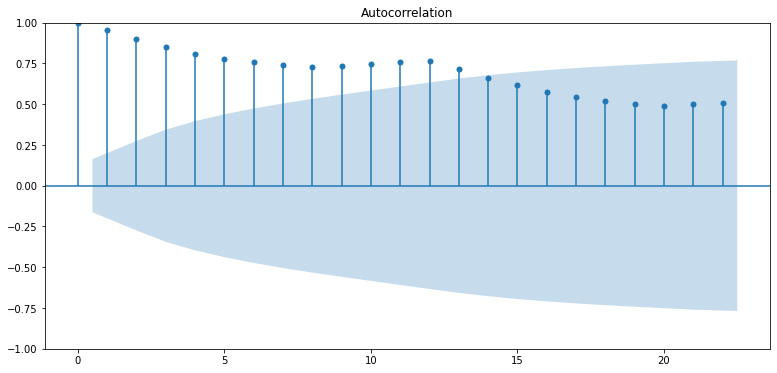

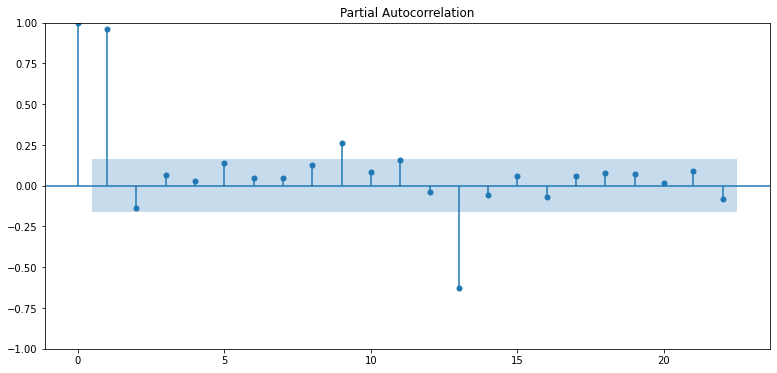

In [40]:
# International airline passengers 시계열을 예시로 듦
# statsmodels에서 제공하는 ACF와 PACF플로팅 기능을 사용할 것.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


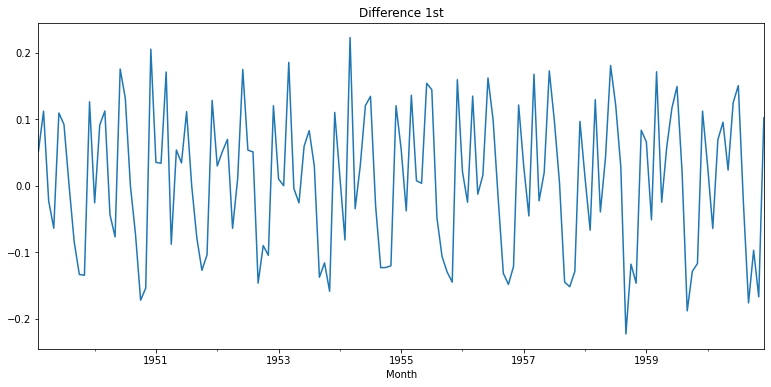

In [41]:
# d를 구하기 위해서는 좀 다른 접근이 필요하다.
# d차 차분을 구해보고 이 때 시계열이 안정된 상태인지를 확인해봐야 함.
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


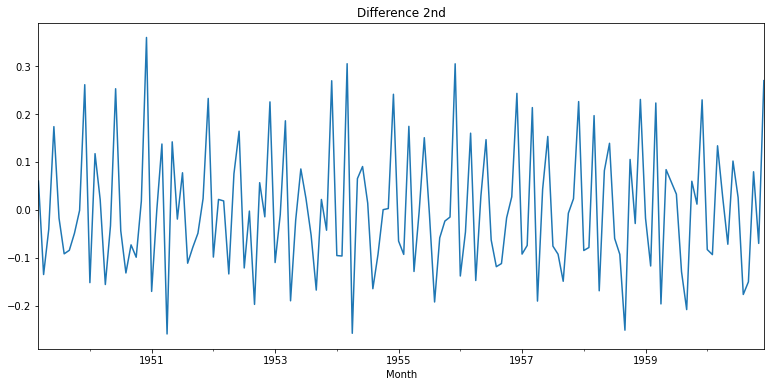

In [42]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### 학습데이터 분리

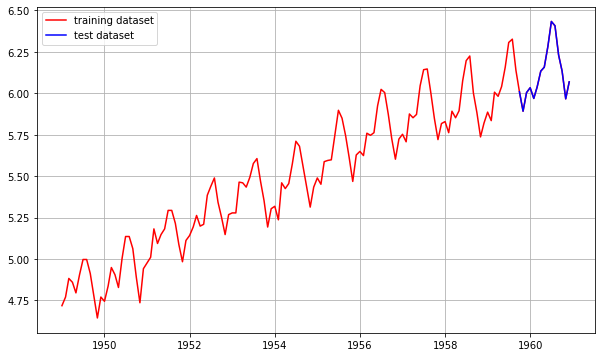

In [43]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [44]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


### ARIMA 모델 훈련과 추론

In [45]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.951
Date:                Thu, 10 Feb 2022   AIC                           -409.902
Time:                        08:39:39   BIC                           -367.121
Sample:                    01-01-1949   HQIC                          -392.520
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2752      0.081     -3.387      0.001      -0.434      -0.116
ar.L2         -0.0124      0.109     -0.114      0.909      -0.225       0.200
ar.L3          0.0002      0.046      0.005      0.9

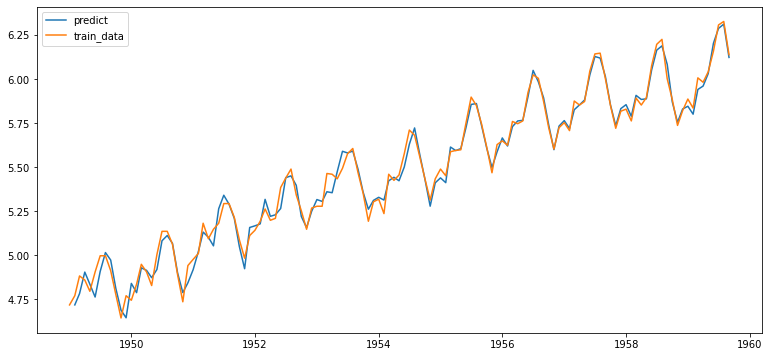

In [46]:
# ARIMA 모델의 훈련 결과를 시각적으로 확인
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

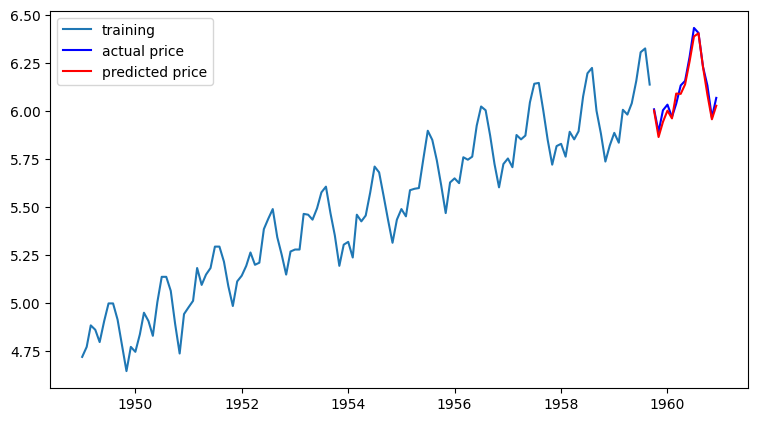

In [47]:
# forecast 메소드를 이용해 테스트 데이터 구간의 데이터를 예측
model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [48]:
# 시계열 데이터를 로그 변환하여 사용했으므로 
# 다시 지수 변환해야 정확한 오차를 계산할 수 있음.
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  231.97320956929948
MAE:  12.424959605677085
RMSE:  15.230666747365314
MAPE: 2.74%


***

## 프로젝트: 주식 예측에 도전해보자

* 루브릭
    * 플로팅과 adfuller 메소드가 모두 적절히 사용되었음
    * p, q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시됨
    * 3개 이상 종복이 MAPE 15% 미만의 정확도로 예측됨

### step1. 시계열 데이터 준비

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)

# 시계열을 만들기 전에 전체적으로 확인
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-18,47950.0,49100.0,47600.0,48800.0,46788.835938,20481981
2020-05-19,50100.0,50500.0,49700.0,50300.0,48227.015625,25168295
2020-05-20,50000.0,50200.0,49800.0,50000.0,47939.382813,14896899
2020-05-21,50300.0,50400.0,49850.0,49950.0,47891.437500,14949266
2020-05-22,49600.0,49800.0,48600.0,48750.0,46740.894531,19706284


In [7]:
# 시계열(Time Series) 만들기
# 종가(close)만 사용한다.
ts = df['Close']
ts.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

### step2. 각종 전처리 수행

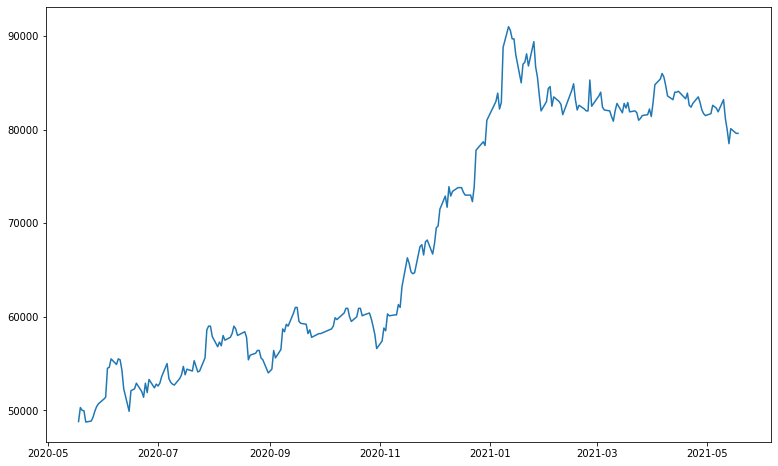

In [10]:
# 시계열 데이터를 차트로 그려본다
plt.rcParams['figure.figsize'] = 13, 8

plt.plot(ts)

In [11]:
# 결측치 확인
ts = ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

우선 결측치는 없는 것으로 확인된다.

In [16]:
# 로그 변환
ts_log = np.log(ts)

ts_log.head()

Date
2020-05-18    10.795486
2020-05-19    10.825760
2020-05-20    10.819778
2020-05-21    10.818778
2020-05-22    10.794460
Name: Close, dtype: float64

### step3. 시계열 안정성 분석

In [17]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [18]:
# statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 
# 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

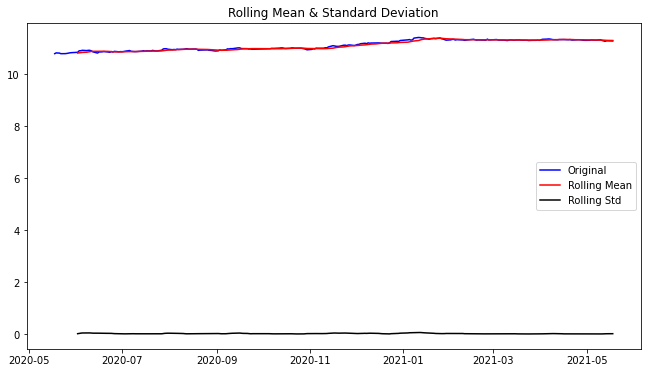

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


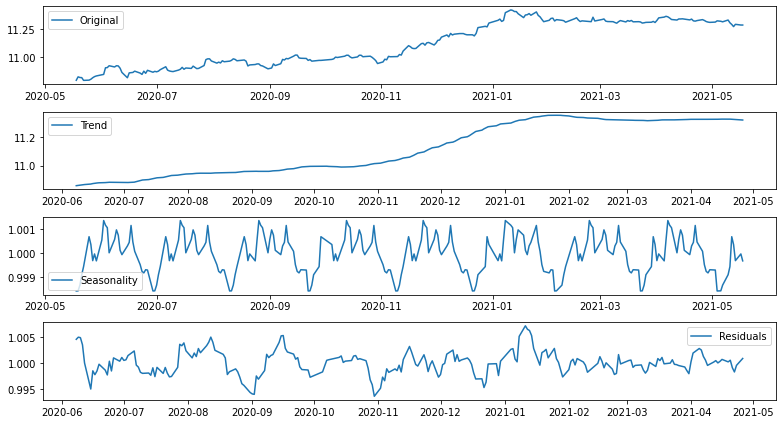

In [20]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

# 정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period=30)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

#plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

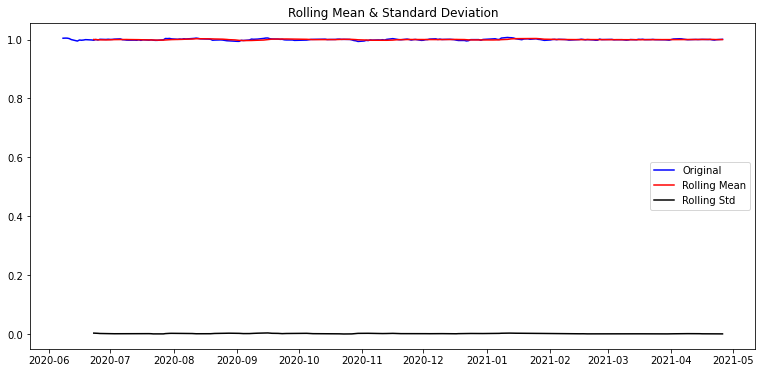

In [21]:
# Residual에 대해 안정성 여부를 따진다.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [22]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


### step4. 학습, 테스트 데이터셋 생성

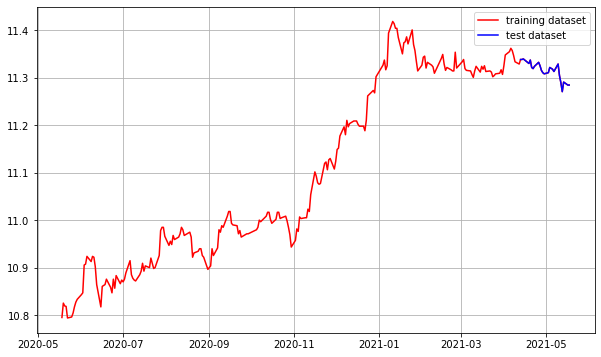

In [23]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### step5. 적정 ARIMA 모수 찾기

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


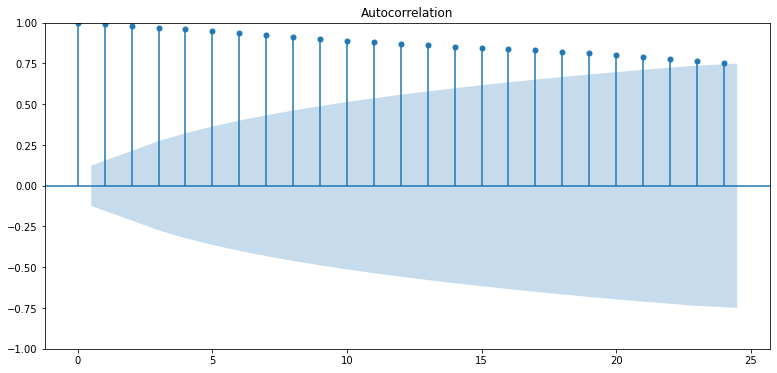

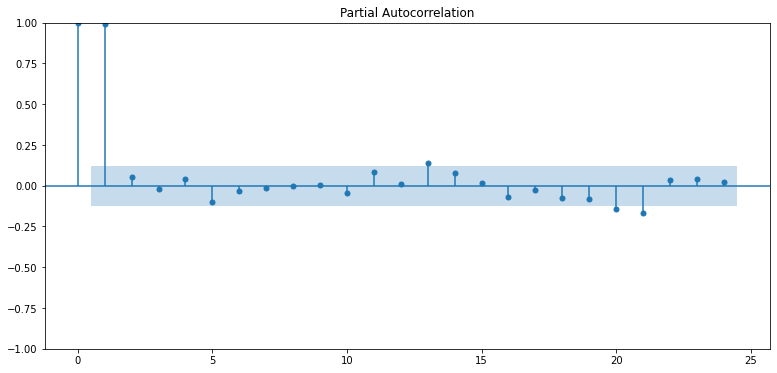

In [24]:
# ACF, PACF 그려보기 -> p, q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


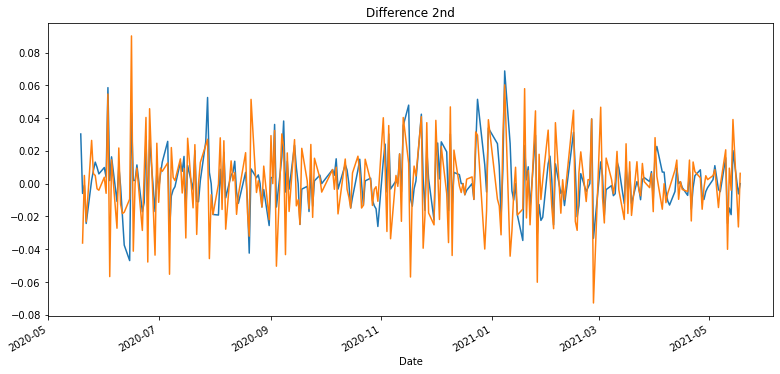

In [25]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### step 6. ARIMA 모델 훈련과 테스트

In [26]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 583.361
Date:                Wed, 16 Feb 2022   AIC                          -1156.722
Time:                        06:43:07   BIC                          -1139.642
Sample:                             0   HQIC                         -1149.828
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.129     86.277      0.000      10.838      11.342
ar.L1          0.7739      1.821      0.425      0.671      -2.796       4.344
ar.L2          0.2191      1.811      0.121      0.9

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


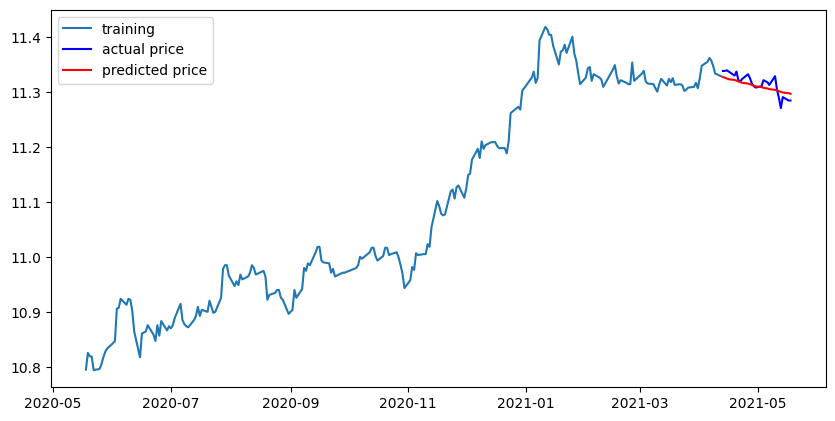

In [27]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1048973.6014239907
MAE:  843.7579531508708
RMSE:  1024.19412292006
MAPE: 1.03%


### step 7. 다른 주식 종목 예측해 보기

#### 7-1. apple 예측

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)

# 시계열을 만들기 전에 전체적으로 확인
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-16,135.490005,136.009995,132.789993,133.190002,132.403076,80576300
2021-02-17,131.250000,132.220001,129.470001,130.839996,130.066956,97918500
2021-02-18,129.199997,130.000000,127.410004,129.710007,128.943634,96856700
2021-02-19,130.240005,130.710007,128.800003,129.869995,129.102661,87668800
2021-02-22,128.009995,129.720001,125.599998,126.000000,125.255539,103916400


In [215]:
# 시계열(Time Series) 만들기
# 종가(close)만 사용한다.
ts = df['Close']
ts.head()

Date
2021-02-16    133.190002
2021-02-17    130.839996
2021-02-18    129.710007
2021-02-19    129.869995
2021-02-22    126.000000
Name: Close, dtype: float64

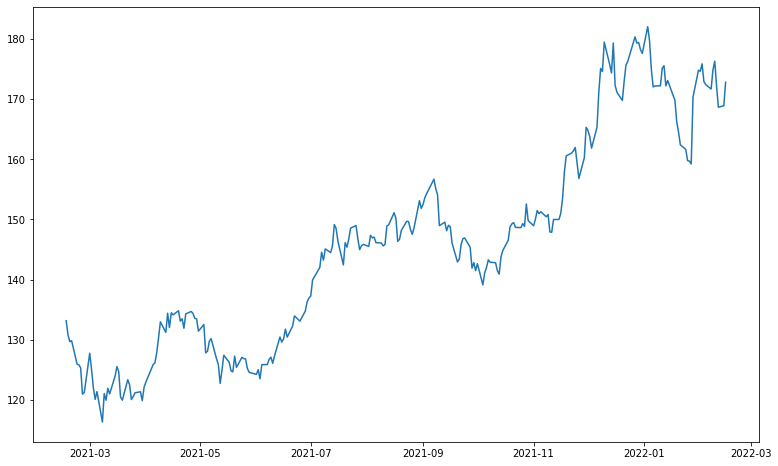

In [216]:
# 시계열 데이터를 차트로 그려본다
plt.rcParams['figure.figsize'] = 13, 8

plt.plot(ts)

In [217]:
# 결측치 확인
ts = ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

결측치 없음

In [218]:
# 로그 변환
ts_log = np.log(ts)

ts_log.head()

Date
2021-02-16    4.891777
2021-02-17    4.873975
2021-02-18    4.865301
2021-02-19    4.866534
2021-02-22    4.836282
Name: Close, dtype: float64

In [220]:
# statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 
# 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [221]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -0.591230
p-value                          0.872951
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


In [222]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -0.623488
p-value                          0.865586
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


로그변환 전과 후의 p-value 값의 차이가 거의 없다. 또한 낮춰줄 필요가 있어보임.

In [219]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

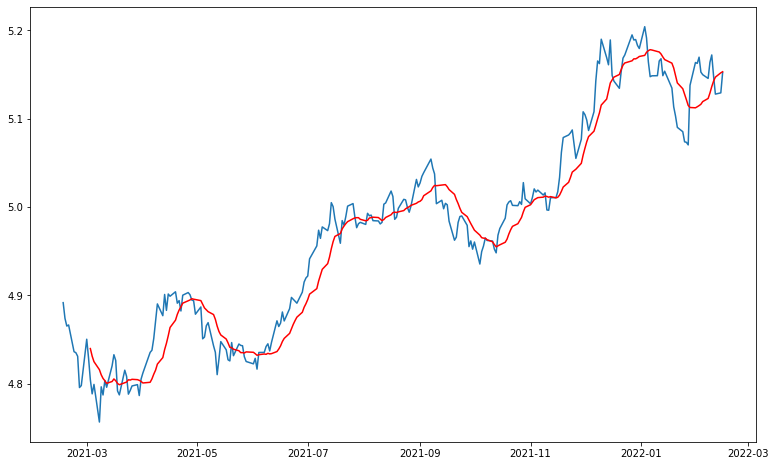

In [223]:
# Moving average 제거 - 추세(Trend) 상쇄하기
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [224]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Date
2021-02-16         NaN
2021-02-17         NaN
2021-02-18         NaN
2021-02-19         NaN
2021-02-22         NaN
2021-02-23         NaN
2021-02-24         NaN
2021-02-25         NaN
2021-02-26         NaN
2021-03-01         NaN
2021-03-02         NaN
2021-03-03   -0.035318
2021-03-04   -0.042656
2021-03-05   -0.025748
2021-03-08   -0.059264
Name: Close, dtype: float64

In [225]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2021-03-03   -0.035318
2021-03-04   -0.042656
2021-03-05   -0.025748
2021-03-08   -0.059264
2021-03-09   -0.013585
2021-03-10   -0.018715
2021-03-11    0.000276
2021-03-12   -0.004456
2021-03-15    0.017666
2021-03-16    0.027418
2021-03-17    0.022946
2021-03-18   -0.008433
2021-03-19   -0.011498
2021-03-22    0.014213
2021-03-23    0.006535
Name: Close, dtype: float64

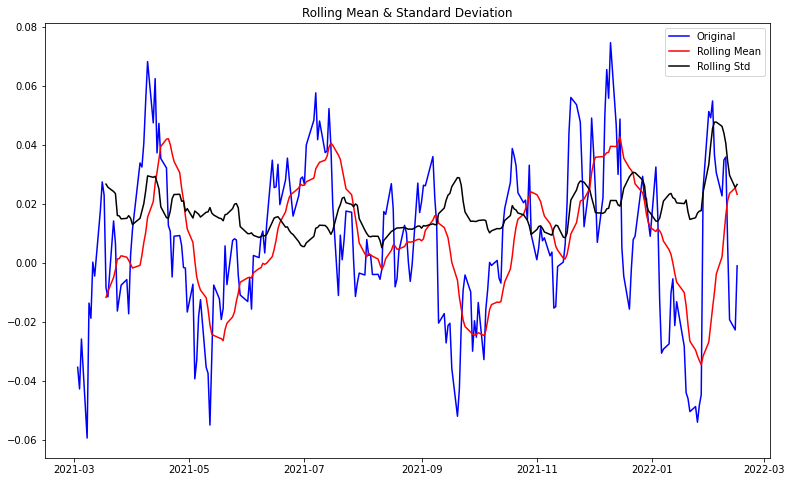

In [226]:
plot_rolling_statistics(ts_log_moving_avg)

In [227]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -4.691714
p-value                          0.000087
#Lags Used                       1.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


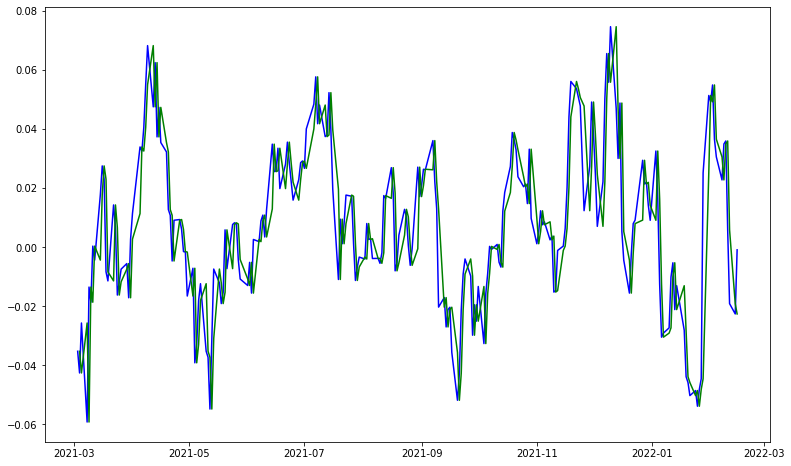

In [228]:
# 차분(Differencing) - 계절성(Seasonality) 상쇄하기
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

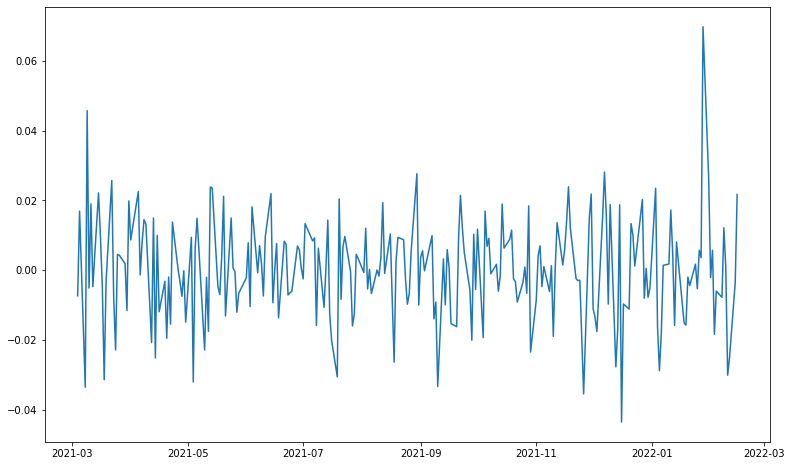

In [229]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

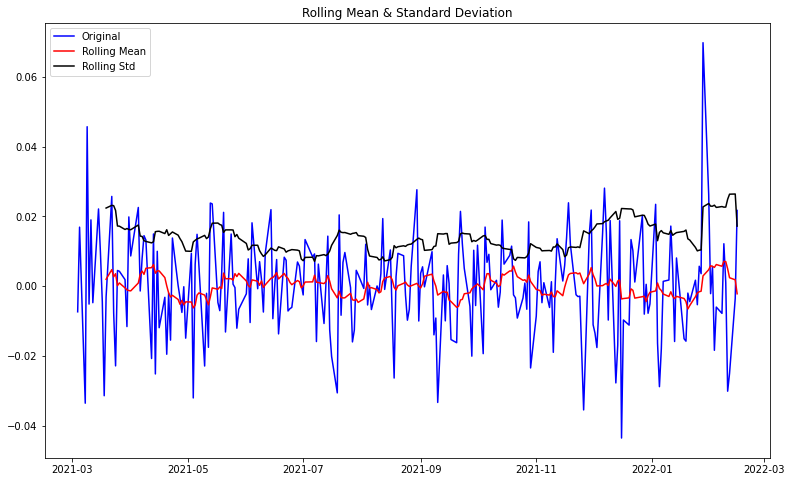

In [230]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [231]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -5.267654
p-value                          0.000006
#Lags Used                      11.000000
Number of Observations Used    230.000000
Critical Value (1%)             -3.459106
Critical Value (5%)             -2.874190
Critical Value (10%)            -2.573512
dtype: float64


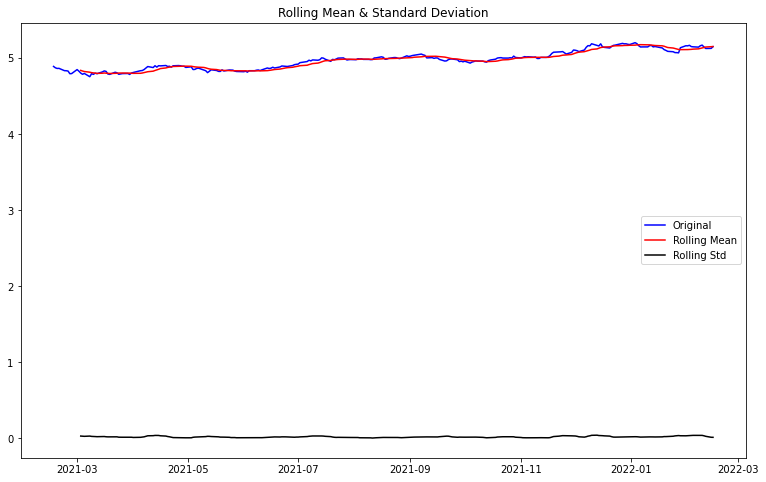

Results of Dickey-Fuller Test:
Test Statistic                  -0.623488
p-value                          0.865586
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


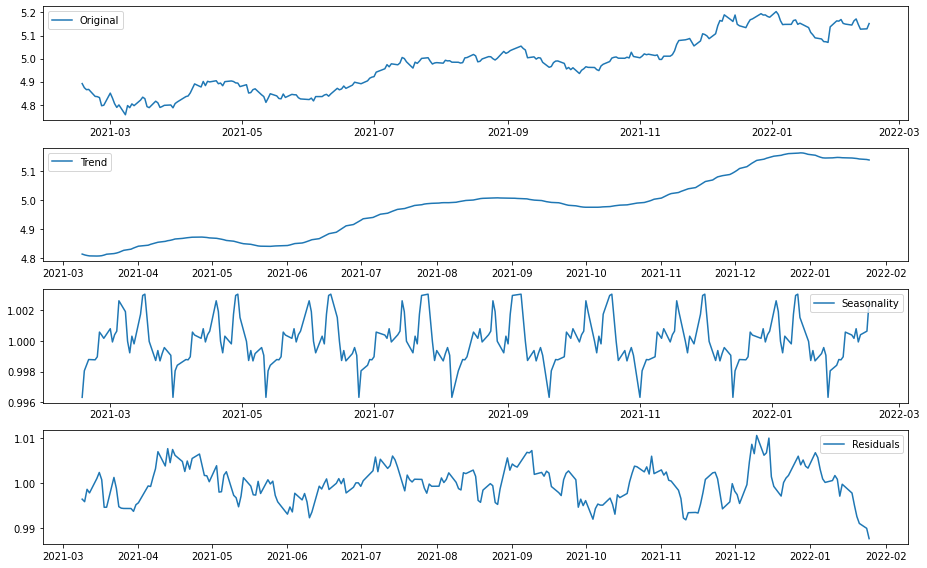

In [234]:
# 시계열 분해
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

# 정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period=30)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

#plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

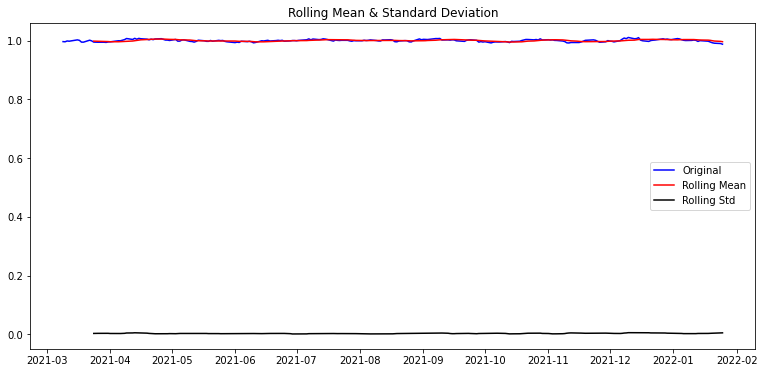

In [235]:
# Residual에 대해 안정성 여부를 따진다.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [236]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.201653
p-value                          0.000655
#Lags Used                       6.000000
Number of Observations Used    217.000000
Critical Value (1%)             -3.460849
Critical Value (5%)             -2.874953
Critical Value (10%)            -2.573919
dtype: float64


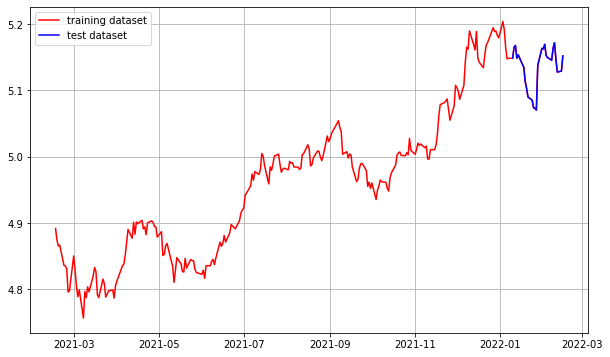

In [237]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


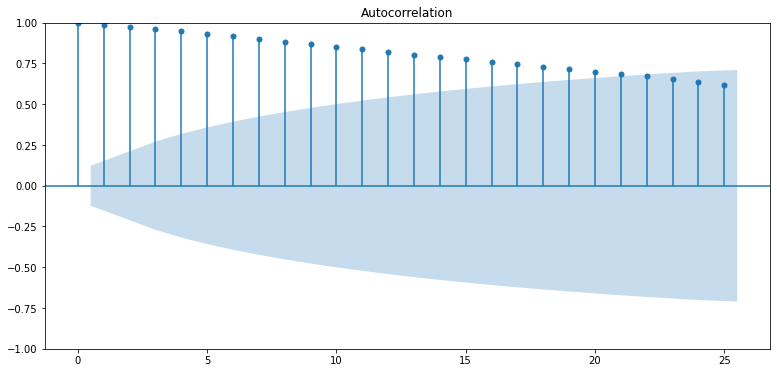

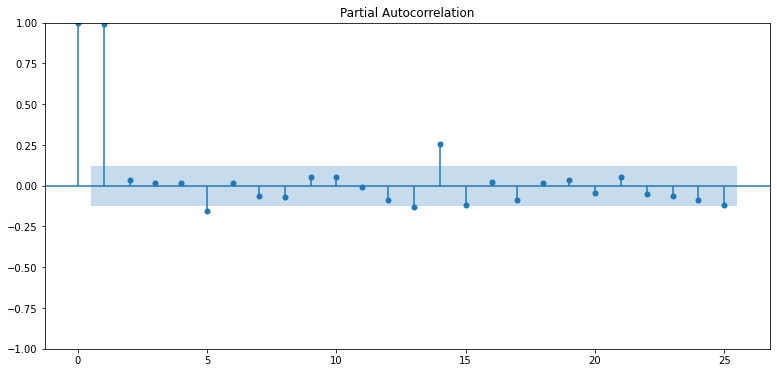

In [238]:
# ACF, PACF 그려보기 -> p, q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.025587e+01
p-value                        4.362888e-18
#Lags Used                     2.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.684706e+00
p-value                        1.472111e-11
#Lags Used                     1.300000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


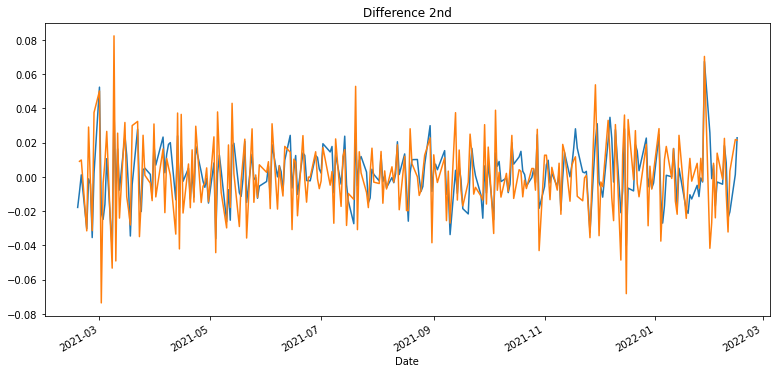

In [239]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [240]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 628.360
Date:                Wed, 16 Feb 2022   AIC                          -1246.719
Time:                        14:12:37   BIC                          -1229.573
Sample:                             0   HQIC                         -1239.801
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9544      0.379     13.077      0.000       4.212       5.697
ar.L1          1.4632      0.633      2.310      0.021       0.222       2.705
ar.L2         -0.4644      0.632     -0.735      0.4

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


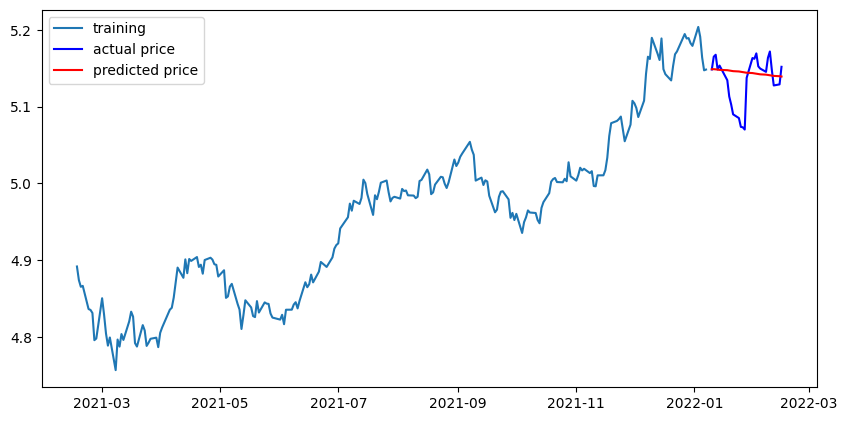

In [241]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [242]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  32.5294877917603
MAE:  4.26387096202147
RMSE:  5.703462789548144
MAPE: 2.57%


#### 7-2. tesla 예측

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/TSLA.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)

# 시계열을 만들기 전에 전체적으로 확인
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-16,818.000000,821.000000,792.440002,796.219971,796.219971,19802300
2021-02-17,779.090027,799.840027,762.010010,798.150024,798.150024,25996500
2021-02-18,780.900024,794.690002,776.270020,787.380005,787.380005,17957100
2021-02-19,795.000000,796.789978,777.369995,781.299988,781.299988,18958300
2021-02-22,762.640015,768.500000,710.200012,714.500000,714.500000,37269700


In [244]:
ts = df['Close']
ts.head()

Date
2021-02-16    796.219971
2021-02-17    798.150024
2021-02-18    787.380005
2021-02-19    781.299988
2021-02-22    714.500000
Name: Close, dtype: float64

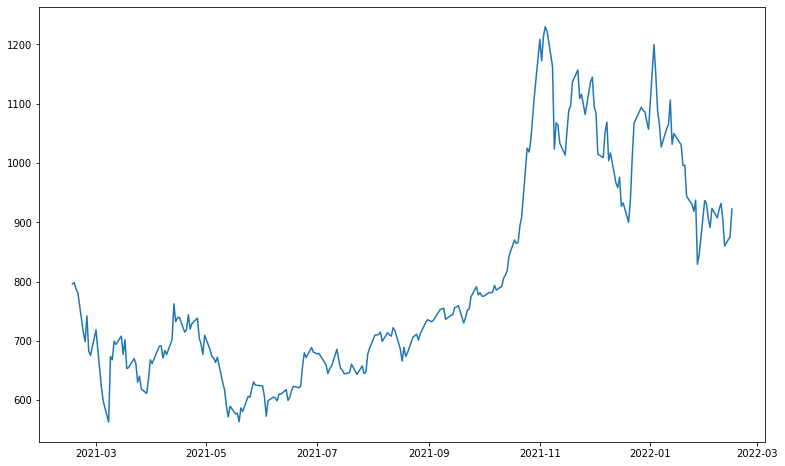

In [245]:
plt.rcParams['figure.figsize'] = 13, 8

plt.plot(ts)

In [246]:
# 결측치 확인
ts = ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

In [247]:
# 로그 변환
ts_log = np.log(ts)

ts_log.head()

Date
2021-02-16    6.679875
2021-02-17    6.682297
2021-02-18    6.668711
2021-02-19    6.660959
2021-02-22    6.571583
Name: Close, dtype: float64

In [ ]:
# statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 
# 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [248]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.321358
p-value                          0.619345
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


In [249]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.255067
p-value                          0.649470
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


apple과 비교했을 때 p-value가 비교적 낮지만, 그래도 높은 수치를 보인다.

In [ ]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

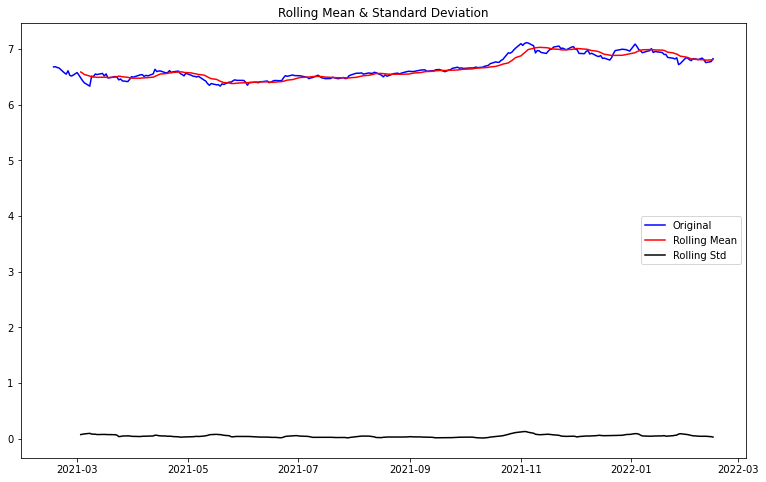

Results of Dickey-Fuller Test:
Test Statistic                  -1.255067
p-value                          0.649470
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


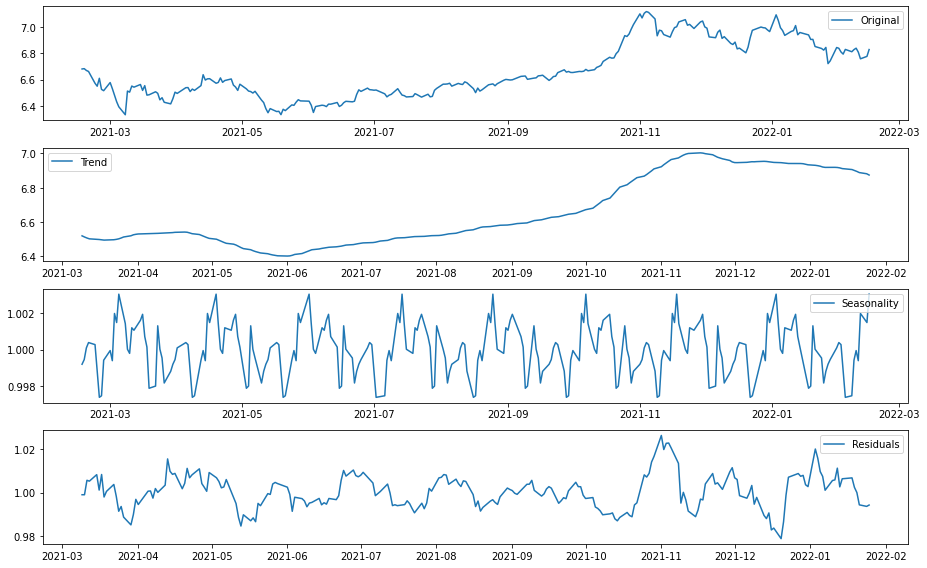

In [250]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

# 정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period=30)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

#plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [251]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.568763e+00
p-value                        8.034281e-09
#Lags Used                     7.000000e+00
Number of Observations Used    2.160000e+02
Critical Value (1%)           -3.460992e+00
Critical Value (5%)           -2.875016e+00
Critical Value (10%)          -2.573952e+00
dtype: float64


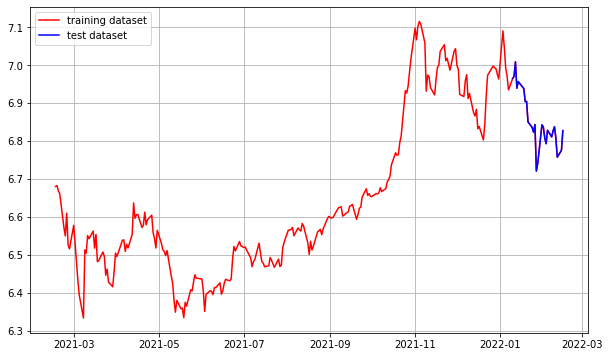

In [252]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


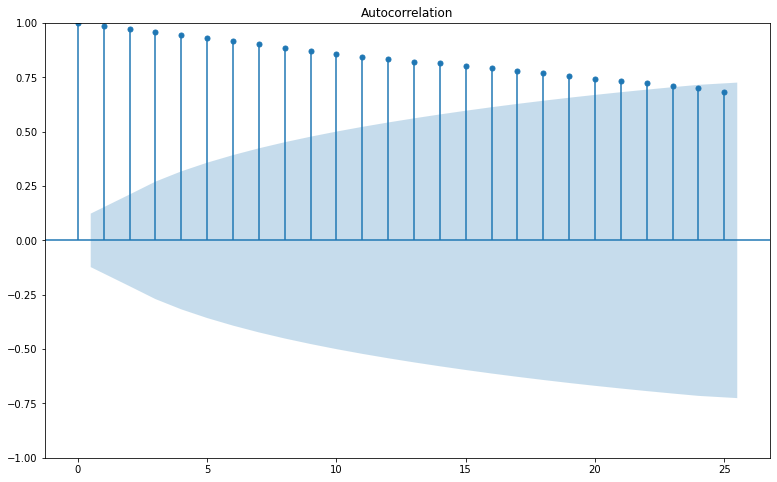

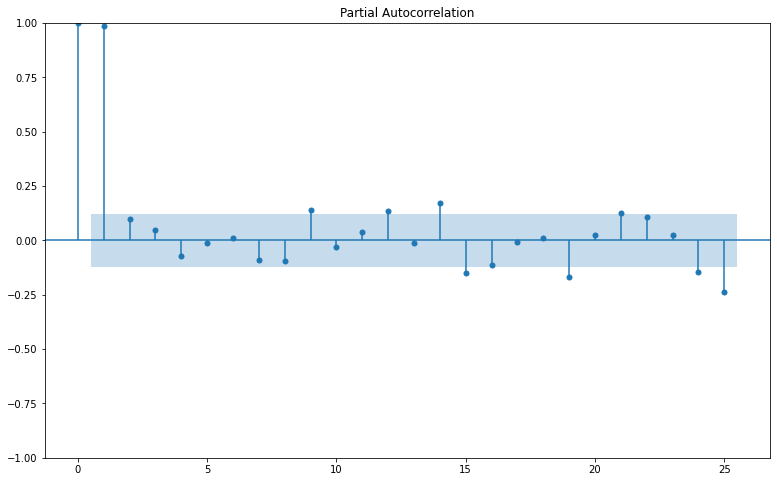

In [253]:
# ACF, PACF 그려보기 -> p, q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.676974e+01
p-value                        1.289868e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.076177e+00
p-value                        4.795546e-10
#Lags Used                     1.600000e+01
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64


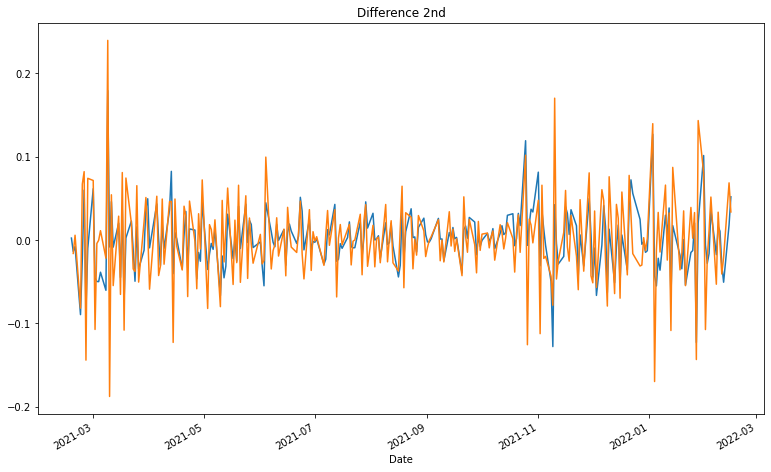

In [254]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [255]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 440.326
Date:                Wed, 16 Feb 2022   AIC                           -870.651
Time:                        14:22:07   BIC                           -853.504
Sample:                             0   HQIC                          -863.733
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7005      0.160     41.940      0.000       6.387       7.014
ar.L1          0.5239      1.474      0.355      0.722      -2.366       3.413
ar.L2          0.4548      1.450      0.314      0.7

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


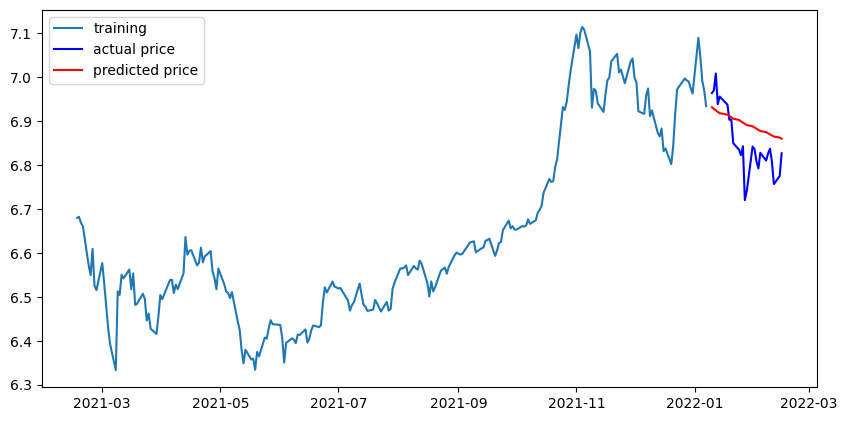

In [256]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [257]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  4501.636896460724
MAE:  57.317457867102966
RMSE:  67.09423892154022
MAPE: 6.25%


#### 7-3. ICLN 예측

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/ICLN.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)

# 시계열을 만들기 전에 전체적으로 확인
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-16,30.879999,30.900000,29.600000,29.980000,29.643644,7989300
2021-02-17,29.770000,29.770000,28.889999,29.480000,29.149256,7708500
2021-02-18,28.520000,28.540001,27.650000,27.950001,27.636421,11352700
2021-02-19,28.400000,28.889999,28.340000,28.490000,28.170361,6861600
2021-02-22,27.760000,27.780001,26.510000,26.600000,26.301567,10240100


In [259]:
# 시계열(Time Series) 만들기
# 종가(close)만 사용한다.
ts = df['Close']
ts.head()

Date
2021-02-16    29.980000
2021-02-17    29.480000
2021-02-18    27.950001
2021-02-19    28.490000
2021-02-22    26.600000
Name: Close, dtype: float64

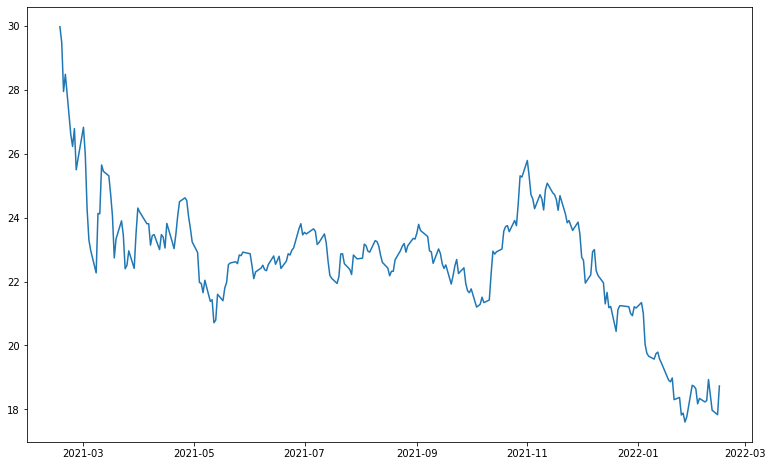

In [260]:
# 시계열 데이터를 차트로 그려본다
plt.rcParams['figure.figsize'] = 13, 8

plt.plot(ts)

In [261]:
# 결측치 확인
ts = ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

In [262]:
# 로그 변환
ts_log = np.log(ts)

ts_log.head()

Date
2021-02-16    3.400530
2021-02-17    3.383712
2021-02-18    3.330417
2021-02-19    3.349553
2021-02-22    3.280911
Name: Close, dtype: float64

In [263]:
# statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 
# 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [264]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -3.307176
p-value                          0.014561
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


In [265]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -2.694210
p-value                          0.075046
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


In [266]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

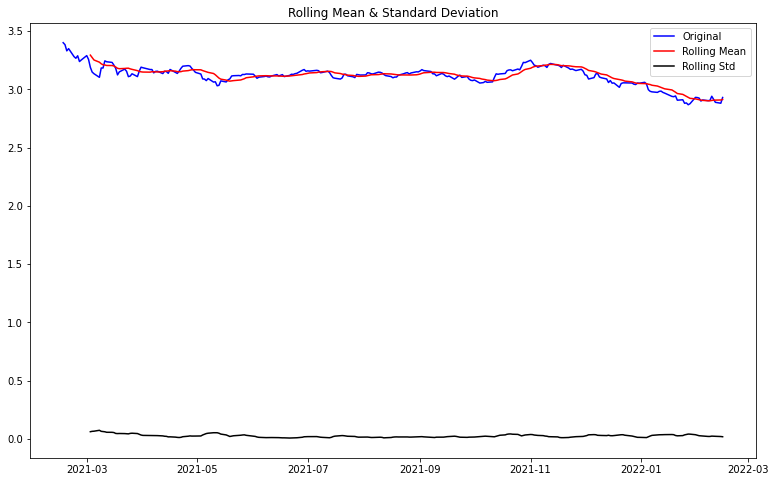

Results of Dickey-Fuller Test:
Test Statistic                  -2.694210
p-value                          0.075046
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


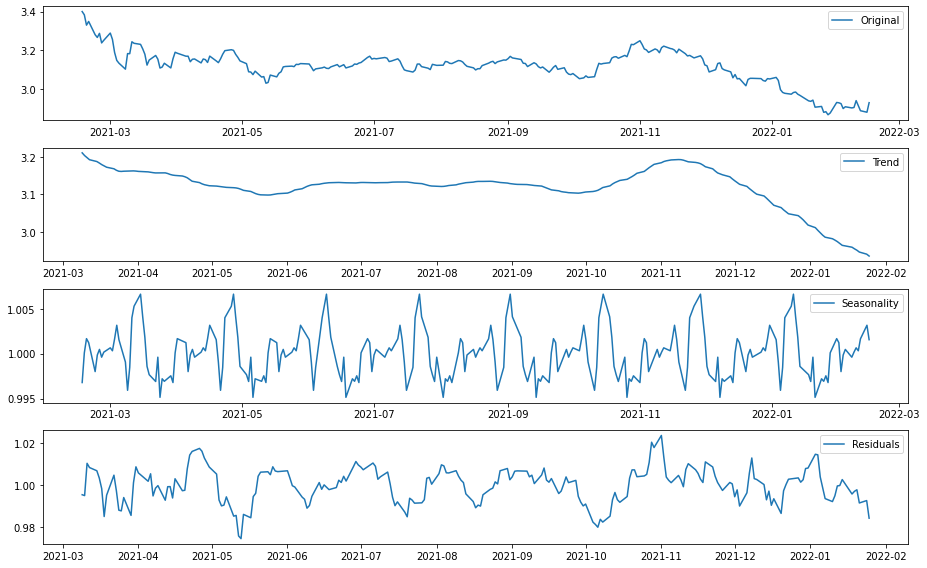

In [267]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

# 정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period=30)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

#plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

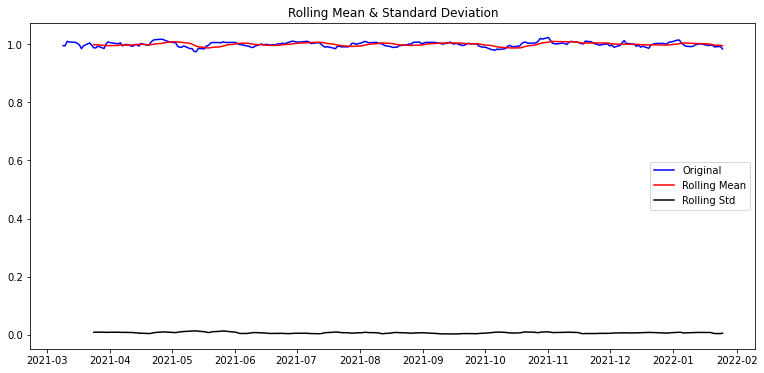

In [268]:
# Residual에 대해 안정성 여부를 따진다.
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [269]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.332102
p-value                          0.000005
#Lags Used                       6.000000
Number of Observations Used    217.000000
Critical Value (1%)             -3.460849
Critical Value (5%)             -2.874953
Critical Value (10%)            -2.573919
dtype: float64


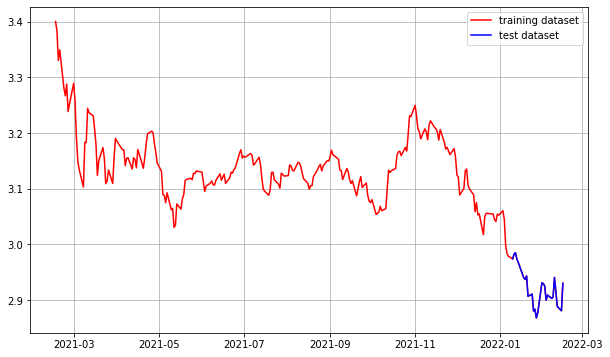

In [270]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


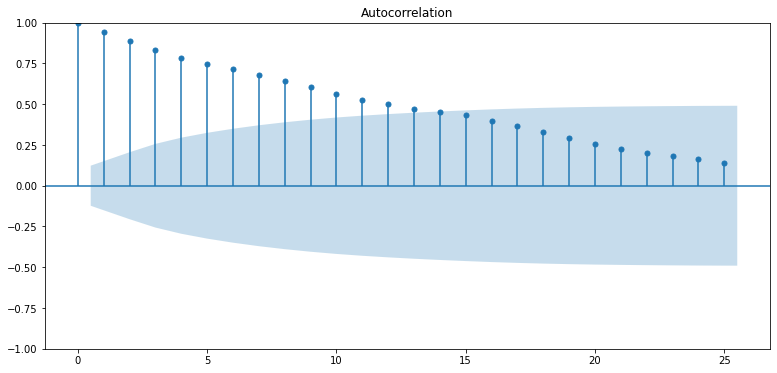

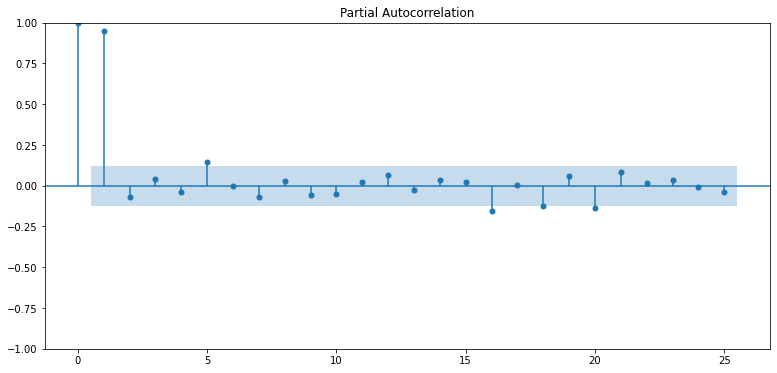

In [271]:
# ACF, PACF 그려보기 -> p, q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.536415e+01
p-value                        3.579624e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.583807e+00
p-value                        2.639021e-11
#Lags Used                     1.400000e+01
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64


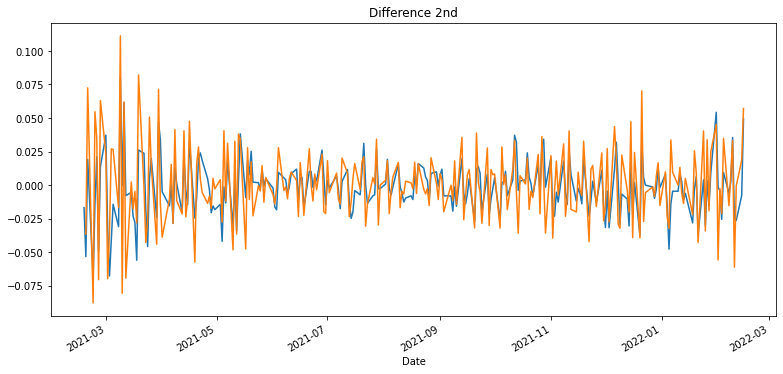

In [272]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [273]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 561.708
Date:                Wed, 16 Feb 2022   AIC                          -1113.416
Time:                        14:26:03   BIC                          -1096.269
Sample:                             0   HQIC                         -1106.497
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6868      1.975      0.854      0.393      -2.185       5.559
ar.L1          0.0131      0.059      0.222      0.824      -0.103       0.129
ar.L2          0.9867      0.059     16.662      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


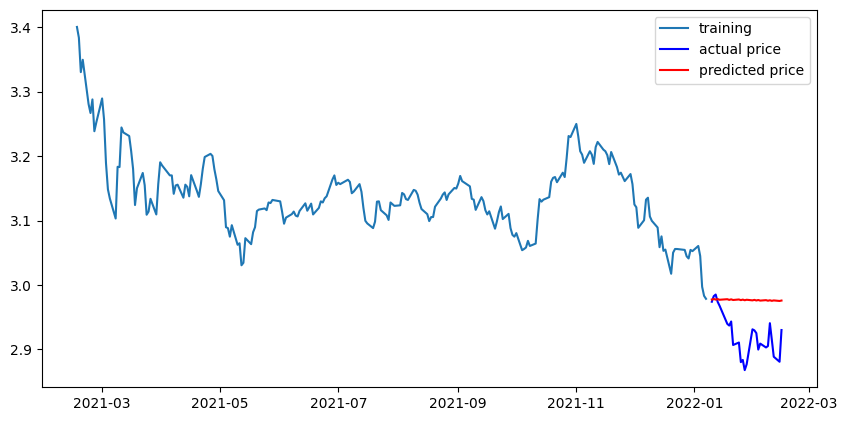

In [274]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [275]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1.4298010154711098
MAE:  1.0409402207737688
RMSE:  1.1957428718044318
MAPE: 5.71%


### 회고

* 시계열을 안정적으로 만드는 방법에 몇 가지가 있는데, 로그 변환 외에 Moving average 제거, 차분 등과 같은 방법을 적용했을 때 학습과 어떤 연관이 있는지 잘 모르겠다. 학습 데이터에서는 ts_log 함수를 계속 쓰는데, 안정적 시계열을 만들어 p-value를 낮춘 것이 반영되는지 모르겠음. 다행히 MAPE 값이 전부 15% 미만으로 나오긴 했는데 분명 p-value가 0.05보다 높으면 시계열이 안정적이지 않다고 알고 있는데 왜 이런 결과가 나왔는지 확실하게 알 수가 없다. 이 부분은 코드를 천천히 뜯어보면서 상관관계를 읽어봐야할 것 같다.

* 통계적 지식의 중요성을 깨달았다. 이번 노드에서만 쓰이는 특정 지식이 아닌 포괄적인 통계 지식에 대한 공부의 필요성을 느꼈고, 이 노드에서는 AR, I, MA을 통해 p, d, q 값을 판단하고 이를 ARIMA에 적용해야하는데 그래프를 보고 어떤 p, d, q값을 적용해야하는지 알 수 없었다. 